## Traitement des données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

### Overview

In [2]:
FOLDER = "data/train_set/"
FEATURES = ['dmop', 'saaf', 'ftl', 'evtf', 'ltdata']
N_VAL = 500
YEAR = 2012

**Solar aspect angles (SAAF):**

* solar angles: sa, sx, sy, sz
* cosines of solar angles
* density, i.e. number of measurements in 1s intervals

**Events Files (EVTF):**

* indicators for occultation and penumbra/umbra events
* indicator for current nadir pointing direction (N-to-S or S-to-N)
* indicator for current Earth pointing direction (N-to-S or S-to-N)
* MEX's current/last position above Mars reference ellipsoid
* MEX's trajectory direction (ascend/descend) w.r.t. the Mars reference ellipsoid

**Flight Dynamics TimeLine (FTL):**

* indicators (one-hot encoding) of each event
* indicator of the communication device being used
 
**Detailed Mission Operations Plan (DMOP):**

* indicator (one-hot encoding) of each command for each subsystem (i.e. last triggered command)
* amount of command changes in the last hour for each subsystem

**Long-term data (LTDATA):**

* as is

## Partie tuto

In [26]:
## Query regex unix
query_all = f"{FOLDER}*" 
file_name_list = glob.glob(query_all) # Query qui retourne toutes les chaînes de caractères commençant par FOLDER
file_name_list


['data/train_set/context--2012-05-27_2014-04-14--dmop.csv',
 'data/train_set/context--2012-05-27_2014-04-14--saaf.csv',
 'data/train_set/power--2008-08-22_2010-07-10.csv',
 'data/train_set/context--2008-08-22_2010-07-10--ftl.csv',
 'data/train_set/context--2012-05-27_2014-04-14--evtf.csv',
 'data/train_set/power--2010-07-10_2012-05-27.csv',
 'data/train_set/context--2012-05-27_2014-04-14--ftl.csv',
 'data/train_set/context--2010-07-10_2012-05-27--ftl.csv',
 'data/train_set/context--2010-07-10_2012-05-27--ltdata.csv',
 'data/train_set/context--2010-07-10_2012-05-27--evtf.csv',
 'data/train_set/context--2008-08-22_2010-07-10--dmop.csv',
 'data/train_set/power--2012-05-27_2014-04-14.csv',
 'data/train_set/context--2012-05-27_2014-04-14--ltdata.csv',
 'data/train_set/context--2008-08-22_2010-07-10--saaf.csv',
 'data/train_set/context--2008-08-22_2010-07-10--ltdata.csv',
 'data/train_set/context--2008-08-22_2010-07-10--evtf.csv',
 'data/train_set/context--2010-07-10_2012-05-27--saaf.csv',
 

### Plot des 500 premières valeurs de toutes les colonnes du dataframe, sans traitement

In [23]:
def plot_group(data, n_val):
    """
    Gather all columns of a dataframe, plot them stacked up to 
    the n_val value (if not the computer crashes because of RAM usage)
    """
    group = list(data.columns)
    fig, ax = plt.subplots(len(group), 1, figsize=(15,1.5 * len(group)))
    k = 0
    for col in group:
        ax[k].plot(data[col][:n_val])
        ax[k].set_title(col,y=0.5,loc="right")
        k+=1
    plt.show()

def selection(folder = FOLDER, search = "*", first = False):
    """
    Return a list of file in a folder following a search query. Return the name of the user selected file.
    If first, output the first result of the query
    """
    query_list = glob.glob(f"{folder}*{search}*")
    query_list_formated = [s.split(folder)[1] for s in query_list]
    query_list_formated_numbered  = [f'{i} - {query_list_formated[i]}' for i in range(len(query_list_formated))]
    if not first :
        for c in query_list_formated_numbered:
            print(c)
        cin = input("Selection : ")
        print(query_list_formated_numbered[int(cin)])
        return query_list[int(cin)]
    else: 
        return query_list[0]

In [16]:
def analyse_brute():
    """
    User select a file from a file list, import the file and plot column values
    up to N_VAL
    """
    file_name = selection(folder = FOLDER, search = f"*{YEAR}*", first = False)
    data = pd.read_csv(file_name, sep=",", index_col=0)
    plot_group(data, N_VAL)

## Affiche des variables brute

### SAAF

0 - context--2012-05-27_2014-04-14--dmop.csv
1 - context--2012-05-27_2014-04-14--saaf.csv
2 - context--2012-05-27_2014-04-14--evtf.csv
3 - power--2010-07-10_2012-05-27.csv
4 - context--2012-05-27_2014-04-14--ftl.csv
5 - context--2010-07-10_2012-05-27--ftl.csv
6 - context--2010-07-10_2012-05-27--ltdata.csv
7 - context--2010-07-10_2012-05-27--evtf.csv
8 - power--2012-05-27_2014-04-14.csv
9 - context--2012-05-27_2014-04-14--ltdata.csv
10 - context--2010-07-10_2012-05-27--saaf.csv
11 - context--2010-07-10_2012-05-27--dmop.csv


Selection :  1


1 - context--2012-05-27_2014-04-14--saaf.csv


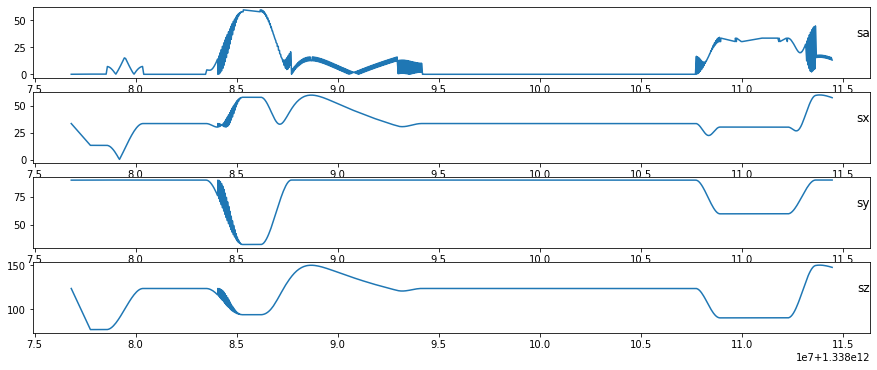

In [28]:
analyse_brute()

### EVTF

0 - context--2012-05-27_2014-04-14--dmop.csv
1 - context--2012-05-27_2014-04-14--saaf.csv
2 - context--2012-05-27_2014-04-14--evtf.csv
3 - power--2010-07-10_2012-05-27.csv
4 - context--2012-05-27_2014-04-14--ftl.csv
5 - context--2010-07-10_2012-05-27--ftl.csv
6 - context--2010-07-10_2012-05-27--ltdata.csv
7 - context--2010-07-10_2012-05-27--evtf.csv
8 - power--2012-05-27_2014-04-14.csv
9 - context--2012-05-27_2014-04-14--ltdata.csv
10 - context--2010-07-10_2012-05-27--saaf.csv
11 - context--2010-07-10_2012-05-27--dmop.csv


Selection :  2


2 - context--2012-05-27_2014-04-14--evtf.csv


TypeError: 'AxesSubplot' object is not subscriptable

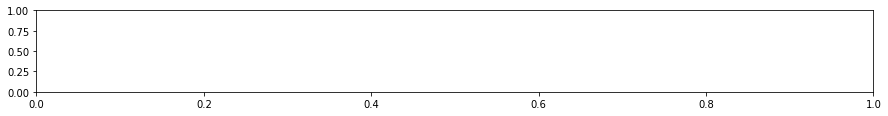

In [29]:
analyse_brute()

### FTL

0 - context--2012-05-27_2014-04-14--dmop.csv
1 - context--2012-05-27_2014-04-14--saaf.csv
2 - context--2012-05-27_2014-04-14--evtf.csv
3 - power--2010-07-10_2012-05-27.csv
4 - context--2012-05-27_2014-04-14--ftl.csv
5 - context--2010-07-10_2012-05-27--ftl.csv
6 - context--2010-07-10_2012-05-27--ltdata.csv
7 - context--2010-07-10_2012-05-27--evtf.csv
8 - power--2012-05-27_2014-04-14.csv
9 - context--2012-05-27_2014-04-14--ltdata.csv
10 - context--2010-07-10_2012-05-27--saaf.csv
11 - context--2010-07-10_2012-05-27--dmop.csv


Selection :  4


4 - context--2012-05-27_2014-04-14--ftl.csv


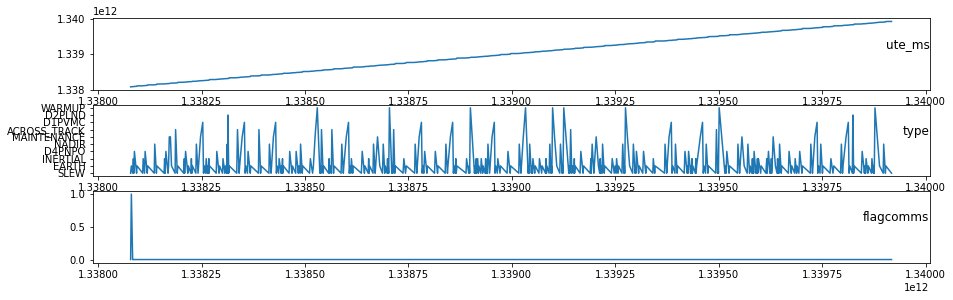

In [30]:
analyse_brute()

### LTDATA

0 - context--2012-05-27_2014-04-14--dmop.csv
1 - context--2012-05-27_2014-04-14--saaf.csv
2 - context--2012-05-27_2014-04-14--evtf.csv
3 - power--2010-07-10_2012-05-27.csv
4 - context--2012-05-27_2014-04-14--ftl.csv
5 - context--2010-07-10_2012-05-27--ftl.csv
6 - context--2010-07-10_2012-05-27--ltdata.csv
7 - context--2010-07-10_2012-05-27--evtf.csv
8 - power--2012-05-27_2014-04-14.csv
9 - context--2012-05-27_2014-04-14--ltdata.csv
10 - context--2010-07-10_2012-05-27--saaf.csv
11 - context--2010-07-10_2012-05-27--dmop.csv


Selection :  9


9 - context--2012-05-27_2014-04-14--ltdata.csv


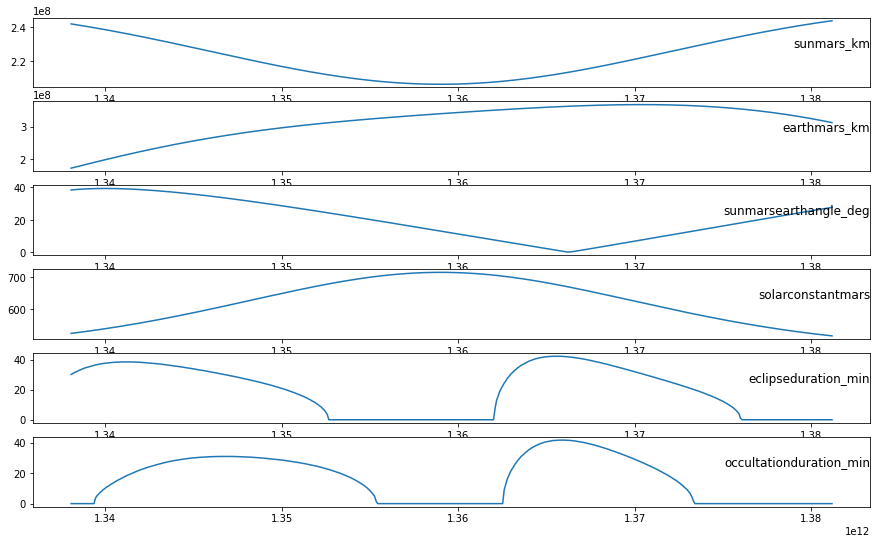

In [31]:
analyse_brute()

In [ ]:
s